In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.ndimage import gaussian_filter, generic_filter
import os

In [2]:
def count_and_locate_bad_pixels(image_data, threshold_factor, neighborhood_size):
    # Calculate local mean and standard deviation for each pixel
    local_mean = gaussian_filter(image_data, sigma=neighborhood_size)
    local_std = np.sqrt(gaussian_filter((image_data - local_mean)**2, sigma=neighborhood_size))

    # Define thresholds based on local statistics
    upper_threshold = local_mean + threshold_factor * local_std
    lower_threshold = local_mean - threshold_factor * local_std

    # Identify bad pixels based on thresholding
    hot_pixels = image_data > upper_threshold
    cold_pixels = image_data < lower_threshold
    bad_pixel_mask = hot_pixels | cold_pixels  # Combine masks for hot and cold pixels

    # Coordinates of bad pixels
    bad_pixel_coords = np.argwhere(bad_pixel_mask)
    num_bad_pixels = len(bad_pixel_coords)

    return num_bad_pixels, bad_pixel_coords, bad_pixel_mask

In [3]:
def process_image(fits_filename, threshold_factor, neighborhood_size, window_size):
    # Read FITS file
    hdul = fits.open(fits_filename)
    image_data = hdul[0].data
    #.data.astype(np.int32)
    hdul.close()

    # Count and locate bad pixels
    num_bad_pixels, bad_pixel_coords, bad_pixel_mask = count_and_locate_bad_pixels(image_data, 
                                                                                   threshold_factor, neighborhood_size)

    print(f"Number of bad pixels in {fits_filename}:", num_bad_pixels)
    print(f"Coordinates of bad pixels in {fits_filename}:", bad_pixel_coords)

    # Plot the original image with bad pixels marked
    plt.figure(figsize=(10, 8))
    plt.imshow(image_data, cmap='gray', origin='lower')
    plt.scatter(bad_pixel_coords[:, 1], bad_pixel_coords[:, 0], color='red', s=1, label='Bad Pixels')
#     plt.colorbar(label='Pixel Value')
    plt.title(f'Bad Pixels in {fits_filename}')
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.legend()
    plt.show()

    # Calculate spatial noise using window method
#     noise_image = generic_filter(image_data, np.std, size=window_size)

#     # Plot the noise image
#     plt.figure(figsize=(10, 8))
#     plt.imshow(noise_image, cmap='viridis', origin='lower')
#     plt.colorbar(label='Noise (Standard Deviation)')
#     plt.title(f'Noise image for {fits_filename}')
#     plt.xlabel('X Pixels')
#     plt.ylabel('Y Pixels')
#     plt.show()
    
    # Histogram of pixel values
#     plt.figure(figsize=(10, 8))
#     plt.hist(image_data.flatten(), bins=100, color='blue', alpha=0.7)
#     plt.title(f'Pixel Value Distribution for {fits_filename}')
#     plt.xlabel('Pixel Value')
#     plt.ylabel('Frequency')
#     plt.show()

    # Histogram of spatial noise
#     plt.figure(figsize=(10, 8))
#     plt.hist(noise_image.flatten(), bins=100, color='green', alpha=0.7)
#     plt.title(f'Spatial Noise Distribution for {fits_filename}')
#     plt.xlabel('Noise (Standard Deviation)')
#     plt.ylabel('Frequency')
#     plt.show()
#     return noise_image

Testing with threshold factor: 5
Number of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: 1301
Coordinates of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: [[   0 1243]
 [   0 1551]
 [   0 1561]
 ...
 [2047  437]
 [2047 1633]
 [2047 1657]]


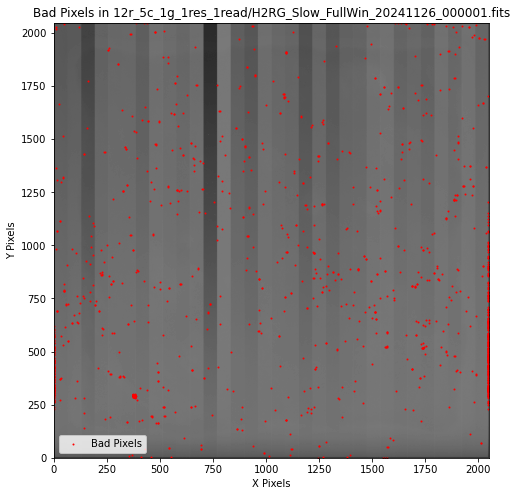

Testing with threshold factor: 10
Number of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: 612
Coordinates of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: [[   5  553]
 [   5 1382]
 [   6 1015]
 ...
 [2031 1474]
 [2034 1924]
 [2038 1989]]


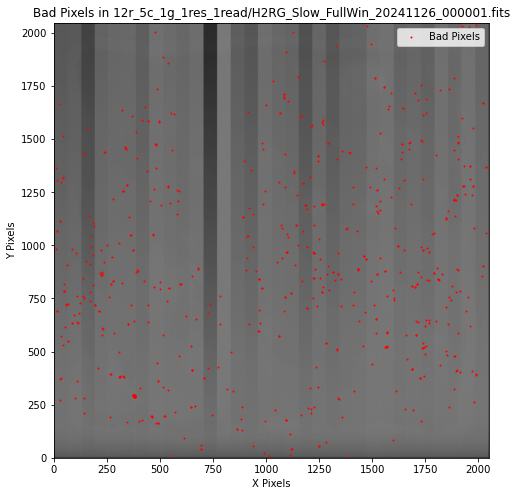

Testing with threshold factor: 20
Number of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: 296
Coordinates of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: [[ 176 1093]
 [ 177 1095]
 [ 180  882]
 [ 191 1359]
 [ 195  522]
 [ 199  747]
 [ 200 1162]
 [ 209 1210]
 [ 215  572]
 [ 226 1040]
 [ 230 1654]
 [ 231 1209]
 [ 236 1197]
 [ 237  888]
 [ 237 1223]
 [ 239  646]
 [ 240  647]
 [ 245  667]
 [ 261 1979]
 [ 270   30]
 [ 276 1344]
 [ 283 1337]
 [ 287  384]
 [ 292  383]
 [ 297  372]
 [ 314 1610]
 [ 315  846]
 [ 316 1414]
 [ 323 1885]
 [ 325  817]
 [ 326  405]
 [ 328 1208]
 [ 332  515]
 [ 335 1246]
 [ 361  492]
 [ 362  492]
 [ 373   32]
 [ 373 1724]
 [ 374 1724]
 [ 381  332]
 [ 382  309]
 [ 382  310]
 [ 383  326]
 [ 386 1744]
 [ 392  266]
 [ 392 1988]
 [ 393  267]
 [ 404 1915]
 [ 406 1892]
 [ 413 1897]
 [ 415  652]
 [ 418 1688]
 [ 419 1686]
 [ 420 1685]
 [ 424  208]
 [ 429 1234]
 [ 436 1821]
 [ 440 1500]
 [ 446  485]
 [ 465 1661]
 [ 479 

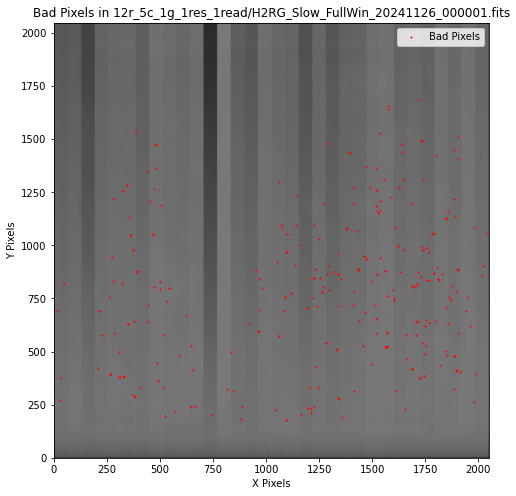

Testing with threshold factor: 30
Number of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: 101
Coordinates of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: [[ 215  572]
 [ 226 1040]
 [ 230 1654]
 [ 236 1197]
 [ 237  888]
 [ 237 1223]
 [ 276 1344]
 [ 283 1337]
 [ 314 1610]
 [ 316 1414]
 [ 326  405]
 [ 328 1208]
 [ 332  515]
 [ 335 1246]
 [ 362  492]
 [ 381  332]
 [ 386 1744]
 [ 418 1688]
 [ 419 1686]
 [ 429 1234]
 [ 440 1500]
 [ 465 1661]
 [ 499  308]
 [ 509 1333]
 [ 510 1334]
 [ 519 1562]
 [ 525 1754]
 [ 528 1458]
 [ 540 1281]
 [ 541 1280]
 [ 572 1059]
 [ 573 1059]
 [ 578  516]
 [ 578 1657]
 [ 587 1519]
 [ 588 1568]
 [ 591 1569]
 [ 595  963]
 [ 595  964]
 [ 620 1748]
 [ 630  349]
 [ 631  349]
 [ 638  443]
 [ 638 1715]
 [ 645  379]
 [ 645 1707]
 [ 648 1753]
 [ 652 1516]
 [ 652 1517]
 [ 687 1467]
 [ 690 1082]
 [ 713 1353]
 [ 719 1408]
 [ 719 1506]
 [ 721  443]
 [ 754 1603]
 [ 757 1089]
 [ 760 1569]
 [ 774 1116]
 [ 779 1412]
 [ 788 

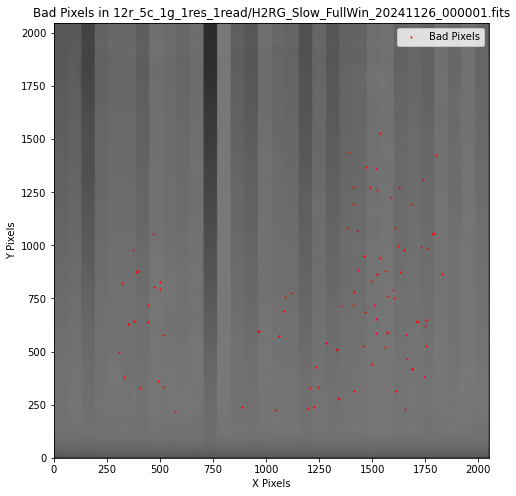

Testing with threshold factor: 40
Number of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: 20
Coordinates of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: [[ 276 1344]
 [ 283 1337]
 [ 314 1610]
 [ 316 1414]
 [ 328 1208]
 [ 332  515]
 [ 335 1246]
 [ 362  492]
 [ 429 1234]
 [ 440 1500]
 [ 465 1661]
 [ 509 1333]
 [ 528 1458]
 [ 573 1059]
 [ 578  516]
 [ 631  349]
 [ 687 1467]
 [ 713 1353]
 [ 719 1408]
 [ 719 1506]]


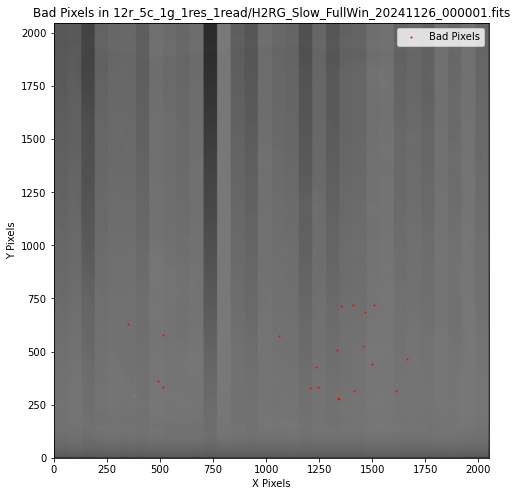

Testing with threshold factor: 50
Number of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: 5
Coordinates of bad pixels in 12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits: [[ 276 1344]
 [ 314 1610]
 [ 316 1414]
 [ 335 1246]
 [ 528 1458]]


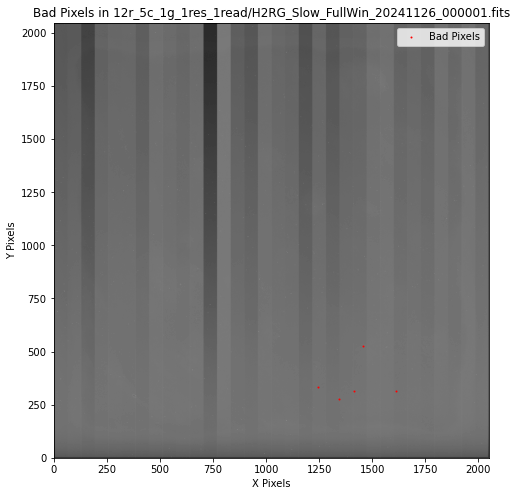

In [4]:
# Define parameters
# Define a range of threshold factors to test
threshold_factors = [5,10,20,30,40,50]
neighborhood_size = 80  # Adjust this size
window_size = 10  # Adjust this size

# Process each image in the folder
fits_filenames = ["12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits"]

for factor in threshold_factors:
    print(f"Testing with threshold factor: {factor}")
    for fits_filename in fits_filenames:
        process_image(fits_filename, factor, neighborhood_size, window_size)

Threshold | Overlap Count | Single Count | Coadded Count | Overlap (Single %) | Overlap (Coadded %)
        5 |           749 |        18815 |          1301 |                3.98% |               57.57%
       10 |           592 |        18815 |           612 |                3.15% |               96.73%
       15 |           463 |        18815 |           463 |                2.46% |              100.00%
       20 |           296 |        18815 |           296 |                1.57% |              100.00%
       50 |             5 |        18815 |             5 |                0.03% |              100.00%
       70 |             0 |        18815 |             0 |                0.00% |                0.00%
       80 |             0 |        18815 |             0 |                0.00% |                0.00%
      100 |             0 |        18815 |             0 |                0.00% |                0.00%
      120 |             0 |        18815 |             0 |                0.

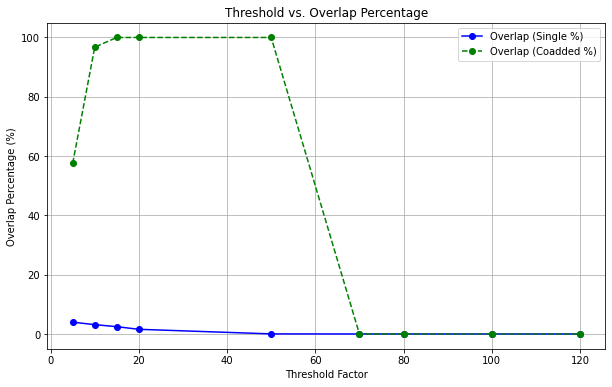

In [10]:
def count_and_locate_bad_pixels(image_data, threshold_factor, neighborhood_size):
    # Calculate local mean and standard deviation for each pixel
    local_mean = gaussian_filter(image_data, sigma=neighborhood_size)
    local_std = np.sqrt(gaussian_filter((image_data - local_mean)**2, sigma=neighborhood_size))

    # Define thresholds based on local statistics
    upper_threshold = local_mean + threshold_factor * local_std
    lower_threshold = local_mean - threshold_factor * local_std

    # Identify bad pixels based on thresholding
    hot_pixels = image_data > upper_threshold
    cold_pixels = image_data < lower_threshold
    bad_pixel_mask = hot_pixels | cold_pixels  # Combine masks for hot and cold pixels

    # Coordinates of bad pixels
    bad_pixel_coords = np.argwhere(bad_pixel_mask)
    num_bad_pixels = len(bad_pixel_coords)

    return num_bad_pixels, bad_pixel_coords, bad_pixel_mask

def calculate_overlap(single_bad_pixel_map, coadded_bad_pixel_map):
    overlap = np.logical_and(single_bad_pixel_map, coadded_bad_pixel_map)
    overlap_count = np.sum(overlap)
    single_count = np.sum(single_bad_pixel_map)
    coadded_count = np.sum(coadded_bad_pixel_map)
    
    overlap_percentage_single = 100 * overlap_count / single_count if single_count > 0 else 0.0
    overlap_percentage_coadded = 100 * overlap_count / coadded_count if coadded_count > 0 else 0.0
    
    return overlap_count, single_count, coadded_count, overlap_percentage_single, overlap_percentage_coadded


# File paths for single-frame and coadded images
single_frame_filename = "10ramp_1c_1g_1read_1reset/H2RG_Slow_FullWin_20241210_000001.fits"
coadded_filename = "12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits"

# Threshold and neighborhood sizes
threshold_factors = [5,10, 15, 20,50,70,80,100,120]
neighborhood_size = 80  # Adjust as needed

# Process single-frame data
with fits.open(single_frame_filename) as hdul:
    single_frame_data = hdul[0].data
_, _, single_bad_pixel_map = count_and_locate_bad_pixels(single_frame_data, threshold_factor=50, neighborhood_size=neighborhood_size)

# Process coadded data with different thresholds and calculate overlap
overlap_results = []
with fits.open(coadded_filename) as hdul:
    coadded_data = hdul[0].data
    
    for threshold in threshold_factors:
        _, _, coadded_bad_pixel_map = count_and_locate_bad_pixels(coadded_data, threshold_factor=threshold, neighborhood_size=neighborhood_size)
        
        # Calculate overlap metrics
        overlap_count, single_count, coadded_count, overlap_percentage_single, overlap_percentage_coadded = calculate_overlap(single_bad_pixel_map, coadded_bad_pixel_map)
        overlap_results.append((threshold, overlap_count, single_count, coadded_count, overlap_percentage_single, overlap_percentage_coadded))


# Print results
print("Threshold | Overlap Count | Single Count | Coadded Count | Overlap (Single %) | Overlap (Coadded %)")
for result in overlap_results:
    print(f"{result[0]:9d} | {result[1]:13d} | {result[2]:12d} | {result[3]:13d} | {result[4]:19.2f}% | {result[5]:19.2f}%")

# Plot overlap percentage vs. threshold
thresholds = [r[0] for r in overlap_results]
overlap_percentage_single = [r[4] for r in overlap_results]
overlap_percentage_coadded = [r[5] for r in overlap_results]

## Varying Threshold

Single Threshold | Coadded Threshold | Overlap Count | Single Count | Coadded Count | Overlap (Single %) | Overlap (Coadded %)
               5 |                 5 |          1300 |      1672029 |          1301 |                0.08% |               99.92%
               5 |                 6 |           788 |      1672029 |           788 |                0.05% |              100.00%
               5 |                 7 |           737 |      1672029 |           737 |                0.04% |              100.00%
               5 |                10 |           612 |      1672029 |           612 |                0.04% |              100.00%
               5 |                20 |           296 |      1672029 |           296 |                0.02% |              100.00%
               5 |                50 |             5 |      1672029 |             5 |                0.00% |              100.00%
               5 |                80 |             0 |      1672029 |             0 |        

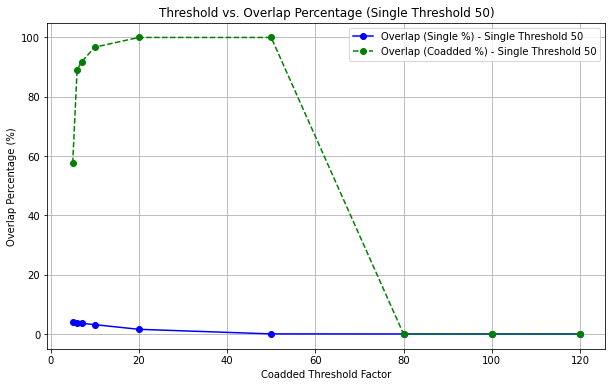

In [12]:
# Function to count and locate bad pixels
def count_and_locate_bad_pixels(image_data, threshold_factor, neighborhood_size):
    # Calculate local mean and standard deviation for each pixel
    local_mean = gaussian_filter(image_data, sigma=neighborhood_size)
    local_std = np.sqrt(gaussian_filter((image_data - local_mean)**2, sigma=neighborhood_size))

    # Define thresholds 
    upper_threshold = local_mean + threshold_factor * local_std
    lower_threshold = local_mean - threshold_factor * local_std

    # Identify bad pixels based on thresholding
    hot_pixels = image_data > upper_threshold
    cold_pixels = image_data < lower_threshold
    bad_pixel_mask = hot_pixels | cold_pixels  # Combine masks for hot and cold pixels

    # Coordinates of bad pixels
    bad_pixel_coords = np.argwhere(bad_pixel_mask)
    num_bad_pixels = len(bad_pixel_coords)

    return num_bad_pixels, bad_pixel_coords, bad_pixel_mask

# calculate overlap metric
def calculate_overlap(single_bad_pixel_map, coadded_bad_pixel_map):
    overlap = np.logical_and(single_bad_pixel_map, coadded_bad_pixel_map)
    overlap_count = np.sum(overlap)
    single_count = np.sum(single_bad_pixel_map)
    coadded_count = np.sum(coadded_bad_pixel_map)

    overlap_percentage_single = 100 * overlap_count / single_count if single_count > 0 else 0.0
    overlap_percentage_coadded = 100 * overlap_count / coadded_count if coadded_count > 0 else 0.0

    return overlap_count, single_count, coadded_count, overlap_percentage_single, overlap_percentage_coadded

# File paths for single-frame and coadded images
single_frame_filename = "10ramp_1c_1g_1read_1reset/H2RG_Slow_FullWin_20241210_000001.fits"
coadded_filename = "12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits"

# Threshold factors for single-frame and coadded data
single_threshold_factors = [5, 6,7, 10, 20, 50, 80, 100,120]  # Thresholds for single-frame
coadded_threshold_factors = [5, 6,7, 10, 20, 50, 80, 100, 120]  # Thresholds for coadded data
neighborhood_size = 80  # Adjust as needed

# Store overlap results for all combinations of single and coadded thresholds
overlap_results = []

# Process single-frame data for each threshold
for single_threshold in single_threshold_factors:
    with fits.open(single_frame_filename) as hdul:
        single_frame_data = hdul[0].data
    _, _, single_bad_pixel_map = count_and_locate_bad_pixels(
        single_frame_data, threshold_factor=single_threshold, neighborhood_size=neighborhood_size
    )

    # Process coadded data for each threshold and compare with single-frame bad pixel maps
    with fits.open(coadded_filename) as hdul:
        coadded_data = hdul[0].data

        for coadded_threshold in coadded_threshold_factors:
            _, _, coadded_bad_pixel_map = count_and_locate_bad_pixels(
                coadded_data, threshold_factor=coadded_threshold, neighborhood_size=neighborhood_size
            )

            # Calculate overlap metrics
            overlap_count, single_count, coadded_count, overlap_percentage_single, overlap_percentage_coadded = calculate_overlap(
                single_bad_pixel_map, coadded_bad_pixel_map
            )

            # Append results
            overlap_results.append((
                single_threshold, coadded_threshold, overlap_count, single_count, 
                coadded_count, overlap_percentage_single, overlap_percentage_coadded
            ))


print("Single Threshold | Coadded Threshold | Overlap Count | Single Count | Coadded Count | Overlap (Single %) | Overlap (Coadded %)")
for result in overlap_results:
    print(f"{result[0]:16d} | {result[1]:17d} | {result[2]:13d} | {result[3]:12d} | {result[4]:13d} | {result[5]:19.2f}% | {result[6]:19.2f}%")

# Plot overlap percentages for a specific single-frame threshold
single_threshold_to_plot = 50  # Choose a single threshold for visualization
plot_data = [r for r in overlap_results if r[0] == single_threshold_to_plot]
coadded_thresholds = [r[1] for r in plot_data]
overlap_percentage_single = [r[5] for r in plot_data]
overlap_percentage_coadded = [r[6] for r in plot_data]

plt.figure(figsize=(10, 6))
plt.plot(coadded_thresholds, overlap_percentage_single, marker='o', linestyle='-', color='blue', label=f'Overlap (Single %) - Single Threshold {single_threshold_to_plot}')
plt.plot(coadded_thresholds, overlap_percentage_coadded, marker='o', linestyle='--', color='green', label=f'Overlap (Coadded %) - Single Threshold {single_threshold_to_plot}')
plt.xlabel('Coadded Threshold Factor')
plt.ylabel('Overlap Percentage (%)')
plt.title(f'Threshold vs. Overlap Percentage (Single Threshold {single_threshold_to_plot})')
plt.legend()
plt.grid(True)
plt.show()

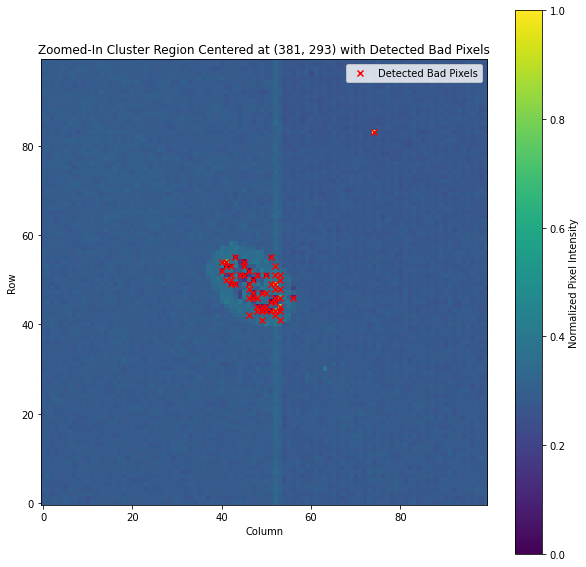

In [4]:
def visualize_cluster_with_detected_bad_pixels(image_data, bad_pixel_coords, cluster_center, box_size=100):
    # Extract cluster region
    row, col = cluster_center
    row_min = max(0, row - box_size // 2)
    row_max = min(image_data.shape[0], row + box_size // 2)
    col_min = max(0, col - box_size // 2)
    col_max = min(image_data.shape[1], col + box_size // 2)

    zoomed_region = image_data[row_min:row_max, col_min:col_max]

    # Normalize for better visualization
    zoomed_region_normalized = (zoomed_region - zoomed_region.min()) / (zoomed_region.max() - zoomed_region.min())

    shifted_bad_pixel_coords = bad_pixel_coords - [row_min, col_min]

    # Create a binary mask for the bad pixels within the zoomed region
    bad_pixel_mask_zoomed = np.zeros_like(zoomed_region, dtype=bool)
    valid_indices = (shifted_bad_pixel_coords[:, 0] >= 0) & (shifted_bad_pixel_coords[:, 0] < zoomed_region.shape[0]) & \
                    (shifted_bad_pixel_coords[:, 1] >= 0) & (shifted_bad_pixel_coords[:, 1] < zoomed_region.shape[1])
    shifted_bad_pixel_coords = shifted_bad_pixel_coords[valid_indices]
    bad_pixel_mask_zoomed[shifted_bad_pixel_coords[:, 0], shifted_bad_pixel_coords[:, 1]] = True

    plt.figure(figsize=(10, 10))
    plt.imshow(zoomed_region_normalized, cmap='viridis', origin='lower', label="Cluster Region")
    
    plt.scatter(shifted_bad_pixel_coords[:, 1], shifted_bad_pixel_coords[:, 0], 
                color='red', marker='x', label="Detected Bad Pixels")

    plt.title(f"Zoomed-In Cluster Region Centered at ({col}, {row}) with Detected Bad Pixels")
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.colorbar(label="Normalized Pixel Intensity")
    plt.legend(loc="upper right")  
    plt.show()

fits_filename = "12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits"
threshold_factor = 6
neighborhood_size = 80

# Read FITS file
with fits.open(fits_filename) as hdul:
    image_data = hdul[0].data

# Detect bad pixels
_, bad_pixel_coords, _ = count_and_locate_bad_pixels(image_data, threshold_factor, neighborhood_size)

# Visualize the cluster with detected bad pixels
cluster_center = (293, 381)  # Replace with cluster's coordinates
box_size = 100
visualize_cluster_with_detected_bad_pixels(image_data, bad_pixel_coords, cluster_center, box_size)

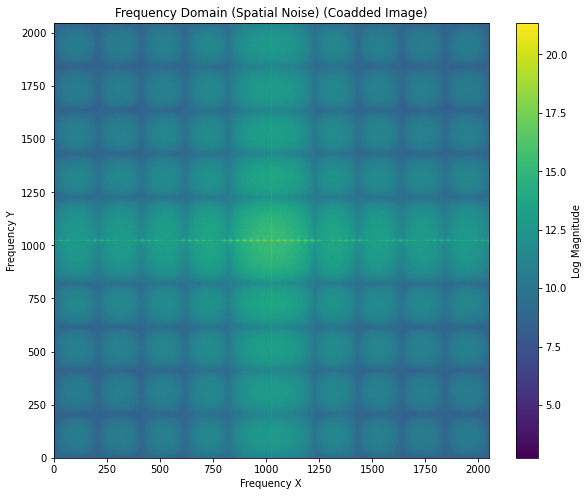

In [8]:
# Reuse your spatial noise function
def calculate_spatial_noise(image_data, window_size):
    return generic_filter(image_data, np.std, size=window_size)

def frequency_analysis_spatial(noise_image, title_suffix=""):
    # Compute 2D FFT of the noise image
    fft_image = np.fft.fft2(noise_image)
    fft_shifted = np.fft.fftshift(fft_image)  # center the zero-frequency component

    # Compute the magnitude spectrum
    magnitude_spectrum = np.log1p(np.abs(fft_shifted))

    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 8))
    plt.imshow(magnitude_spectrum, origin='lower', cmap='viridis')
    plt.colorbar(label='Log Magnitude')
    plt.title(f'Frequency Domain (Spatial Noise) {title_suffix}')
    plt.xlabel('Frequency X')
    plt.ylabel('Frequency Y')
    plt.show()

# Load the coadded image
coadded_filename = "12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits"
with fits.open(coadded_filename) as hdul:
    coadded_image_data = hdul[0].data

# Generate the spatial noise map for the coadded image
window_size = 10  # Adjust the window size as needed
coadded_noise_image = calculate_spatial_noise(coadded_image_data, window_size)

# Perform FFT analysis 
frequency_analysis_spatial(coadded_noise_image, title_suffix="(Coadded Image)")

Peak 1: Frequency X = 0.032, Frequency Y = -0.256, Magnitude = 9.01
Peak 2: Frequency X = -0.032, Frequency Y = 0.256, Magnitude = 9.01
Peak 3: Frequency X = -0.026, Frequency Y = 0.455, Magnitude = 8.96
Peak 4: Frequency X = 0.026, Frequency Y = -0.455, Magnitude = 8.96
Peak 5: Frequency X = -0.004, Frequency Y = -0.030, Magnitude = 8.95
Peak 6: Frequency X = 0.004, Frequency Y = 0.030, Magnitude = 8.95
Peak 7: Frequency X = 0.288, Frequency Y = -0.146, Magnitude = 8.94
Peak 8: Frequency X = -0.288, Frequency Y = 0.146, Magnitude = 8.94
Peak 9: Frequency X = 0.347, Frequency Y = 0.180, Magnitude = 8.90
Peak 10: Frequency X = -0.347, Frequency Y = -0.180, Magnitude = 8.90


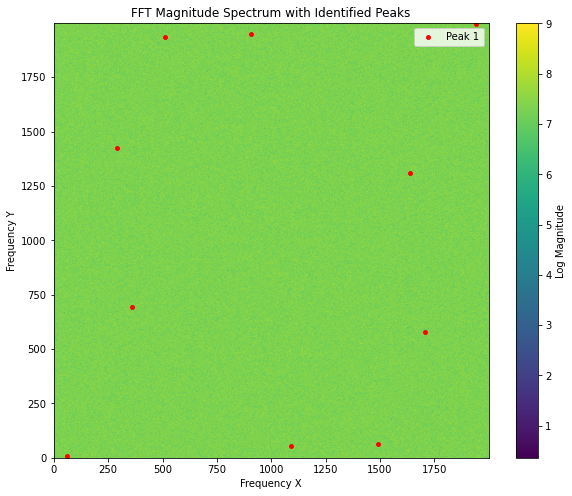

In [9]:
def analyze_fft_frequencies(noise_image):
    # Compute 2D FFT of the noise image
    fft_image = np.fft.fft2(noise_image)
    fft_shifted = np.fft.fftshift(fft_image)  # center the zero-frequency component

    # Compute the magnitude spectrum
    magnitude_spectrum = np.log1p(np.abs(fft_shifted))

    # Identify frequency peaks
    freq_x, freq_y = magnitude_spectrum.shape
    x_freqs = np.fft.fftfreq(freq_x)
    y_freqs = np.fft.fftfreq(freq_y)
    peak_indices = np.unravel_index(np.argsort(magnitude_spectrum.ravel())[::-1], magnitude_spectrum.shape)

    # Plot the FFT magnitude spectrum
    plt.figure(figsize=(10, 8))
    plt.imshow(magnitude_spectrum, origin='lower', cmap='viridis')
    plt.colorbar(label='Log Magnitude')
    plt.title('FFT Magnitude Spectrum with Identified Peaks')
    plt.xlabel('Frequency X')
    plt.ylabel('Frequency Y')

    # Highlight the top periodic frequencies
    num_peaks = 10
    for i in range(num_peaks):
        px, py = peak_indices[0][i], peak_indices[1][i]
        plt.scatter(py, px, color='red', s=15, label=f"Peak {i+1}" if i == 0 else "")
        print(f"Peak {i+1}: Frequency X = {x_freqs[px]:.3f}, Frequency Y = {y_freqs[py]:.3f}, Magnitude = {magnitude_spectrum[px, py]:.2f}")

    plt.legend()
    plt.show()

    return fft_image, fft_shifted, magnitude_spectrum

# Assuming `coadded_noise_image` is loaded or generated from earlier
# Example placeholder image:
coadded_noise_image = np.random.normal(size=(2000, 2000))  # Simulated noise

# Analyze frequencies in the FFT
fft_image, fft_shifted, magnitude_spectrum = analyze_fft_frequencies(coadded_noise_image)

FFT Analysis After Row-Wise Mean Subtraction:
Peak 1: Frequency X = -0.242, Frequency Y = -0.047, Magnitude = 7.56
Peak 2: Frequency X = 0.242, Frequency Y = 0.047, Magnitude = 7.56
Peak 3: Frequency X = 0.096, Frequency Y = -0.395, Magnitude = 7.49
Peak 4: Frequency X = -0.096, Frequency Y = 0.395, Magnitude = 7.49
Peak 5: Frequency X = -0.174, Frequency Y = -0.320, Magnitude = 7.45
Peak 6: Frequency X = 0.174, Frequency Y = 0.320, Magnitude = 7.45
Peak 7: Frequency X = 0.443, Frequency Y = -0.475, Magnitude = 7.45
Peak 8: Frequency X = -0.443, Frequency Y = 0.475, Magnitude = 7.45
Peak 9: Frequency X = -0.043, Frequency Y = -0.477, Magnitude = 7.41
Peak 10: Frequency X = 0.043, Frequency Y = 0.477, Magnitude = 7.41


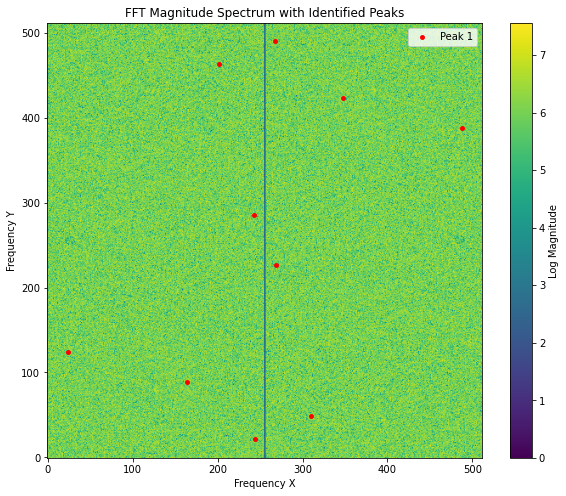

FFT Analysis After Column-Wise Mean Subtraction:
Peak 1: Frequency X = 0.242, Frequency Y = 0.047, Magnitude = 7.56
Peak 2: Frequency X = -0.242, Frequency Y = -0.047, Magnitude = 7.56
Peak 3: Frequency X = 0.096, Frequency Y = -0.395, Magnitude = 7.49
Peak 4: Frequency X = -0.096, Frequency Y = 0.395, Magnitude = 7.49
Peak 5: Frequency X = -0.174, Frequency Y = -0.320, Magnitude = 7.45
Peak 6: Frequency X = 0.174, Frequency Y = 0.320, Magnitude = 7.45
Peak 7: Frequency X = 0.443, Frequency Y = -0.475, Magnitude = 7.45
Peak 8: Frequency X = -0.443, Frequency Y = 0.475, Magnitude = 7.45
Peak 9: Frequency X = -0.043, Frequency Y = -0.477, Magnitude = 7.41
Peak 10: Frequency X = 0.043, Frequency Y = 0.477, Magnitude = 7.41


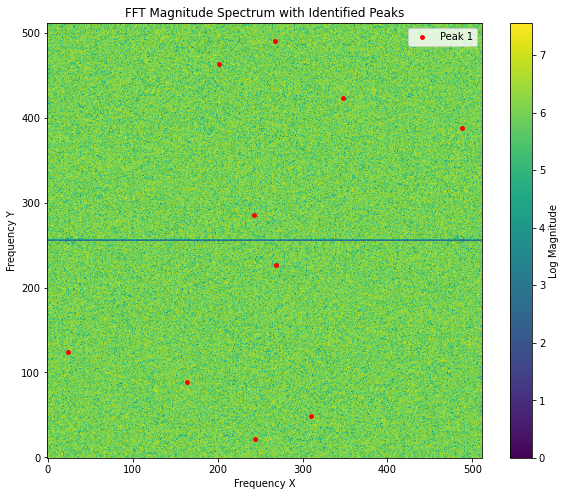

In [12]:
def preprocess_image_by_mean_subtraction(image_data, axis=1):
    mean_profile = np.mean(image_data, axis=axis, keepdims=True)
    processed_image = image_data - mean_profile
    return processed_image

# Simulated placeholder noise image (replace with your actual noise image)
np.random.seed(42)  
coadded_noise_image = np.random.normal(size=(512, 512))

# Perform row-wise mean subtraction
row_subtracted_image = preprocess_image_by_mean_subtraction(coadded_noise_image, axis=1)

# Perform column-wise mean subtraction
column_subtracted_image = preprocess_image_by_mean_subtraction(coadded_noise_image, axis=0)

# define the analyze_fft_frequencies function
def analyze_fft_frequencies(noise_image):
    # Compute 2D FFT of the noise image
    fft_image = np.fft.fft2(noise_image)
    fft_shifted = np.fft.fftshift(fft_image)  # center the zero-frequency component

    # Compute the magnitude spectrum
    magnitude_spectrum = np.log1p(np.abs(fft_shifted))

    # Identify frequency peaks
    freq_x, freq_y = magnitude_spectrum.shape
    x_freqs = np.fft.fftfreq(freq_x)
    y_freqs = np.fft.fftfreq(freq_y)
    peak_indices = np.unravel_index(np.argsort(magnitude_spectrum.ravel())[::-1], magnitude_spectrum.shape)

    # Plot the FFT magnitude spectrum
    plt.figure(figsize=(10, 8))
    plt.imshow(magnitude_spectrum, origin='lower', cmap='viridis')
    plt.colorbar(label='Log Magnitude')
    plt.title('FFT Magnitude Spectrum with Identified Peaks')
    plt.xlabel('Frequency X')
    plt.ylabel('Frequency Y')
    num_peaks = 10
    for i in range(num_peaks):
        px, py = peak_indices[0][i], peak_indices[1][i]
        plt.scatter(py, px, color='red', s=15, label=f"Peak {i+1}" if i == 0 else "")
        print(f"Peak {i+1}: Frequency X = {x_freqs[px]:.3f}, Frequency Y = {y_freqs[py]:.3f}, Magnitude = {magnitude_spectrum[px, py]:.2f}")

    plt.legend()
    plt.show()

    return fft_image, fft_shifted, magnitude_spectrum

# Re-run FFT for row-wise mean-subtracted image
print("FFT Analysis After Row-Wise Mean Subtraction:")
fft_image_row, fft_shifted_row, magnitude_spectrum_row = analyze_fft_frequencies(row_subtracted_image)

# Re-run FFT for column-wise mean-subtracted image
print("FFT Analysis After Column-Wise Mean Subtraction:")
fft_image_column, fft_shifted_column, magnitude_spectrum_column = analyze_fft_frequencies(column_subtracted_image)

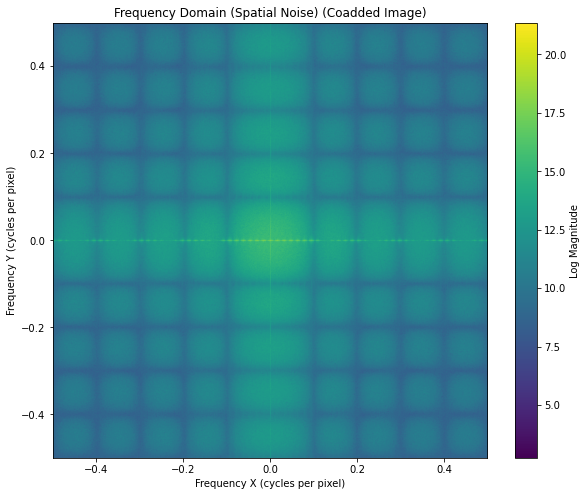

In [13]:
# Reuse your spatial noise function
def calculate_spatial_noise(image_data, window_size):
    return generic_filter(image_data, np.std, size=window_size)

def frequency_analysis_spatial(noise_image, title_suffix=""):
    # Compute 2D FFT of the noise image
    fft_image = np.fft.fft2(noise_image)
    fft_shifted = np.fft.fftshift(fft_image)  # center the zero-frequency component

    # Compute the magnitude spectrum
    magnitude_spectrum = np.log1p(np.abs(fft_shifted))

    # Compute frequencies for proper axis labeling
    image_size = noise_image.shape[0]  # Assuming square image
    freqs = np.fft.fftfreq(image_size)
    freq_mesh_x, freq_mesh_y = np.meshgrid(freqs, freqs)

    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 8))
    plt.imshow(magnitude_spectrum, extent=[freq_mesh_x.min(), freq_mesh_x.max(),
                                           freq_mesh_y.min(), freq_mesh_y.max()],
               origin='lower', cmap='viridis')
    plt.colorbar(label='Log Magnitude')
    plt.title(f'Frequency Domain (Spatial Noise) {title_suffix}')
    plt.xlabel('Frequency X (cycles per pixel)')
    plt.ylabel('Frequency Y (cycles per pixel)')
    plt.show()

# Load the coadded image
coadded_filename = "12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits"
with fits.open(coadded_filename) as hdul:
    coadded_image_data = hdul[0].data

# Generate the spatial noise map for the coadded image
window_size = 10  # Adjust the window size as needed
coadded_noise_image = calculate_spatial_noise(coadded_image_data, window_size)

# Perform FFT analysis on the spatial noise map
frequency_analysis_spatial(coadded_noise_image, title_suffix="(Coadded Image)")

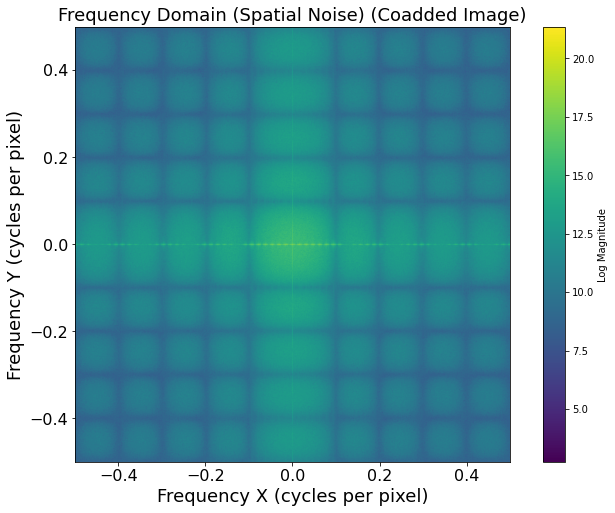

In [2]:
# Reuse your spatial noise function
def calculate_spatial_noise(image_data, window_size):
    return generic_filter(image_data, np.std, size=window_size)

def frequency_analysis_spatial(noise_image, title_suffix="", save_path=None):
    # Compute 2D FFT of the noise image
    fft_image = np.fft.fft2(noise_image)
    fft_shifted = np.fft.fftshift(fft_image)  # center the zero-frequency component

    # Compute the magnitude spectrum
    magnitude_spectrum = np.log1p(np.abs(fft_shifted))

    # Compute frequencies for proper axis labeling
    image_size = noise_image.shape[0]  # Assuming square image
    freqs = np.fft.fftfreq(image_size)
    freq_mesh_x, freq_mesh_y = np.meshgrid(freqs, freqs)

    # Plot the magnitude spectrum
    plt.figure(figsize=(12, 8))  # Increase figure size
    plt.imshow(magnitude_spectrum, extent=[freq_mesh_x.min(), freq_mesh_x.max(),
                                           freq_mesh_y.min(), freq_mesh_y.max()],
               origin='lower', cmap='viridis')
    plt.colorbar(label='Log Magnitude')
    plt.title(f'Frequency Domain (Spatial Noise) {title_suffix}', fontsize=18)
    plt.xlabel('Frequency X (cycles per pixel)', fontsize=18)
    plt.ylabel('Frequency Y (cycles per pixel)', fontsize=18)
    plt.tick_params(axis="both", which="major", labelsize=16)

    # Save the plot if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    plt.show()

# Load the coadded image
coadded_filename = "12r_5c_1g_1res_1read/H2RG_Slow_FullWin_20241126_000001.fits"
with fits.open(coadded_filename) as hdul:
    coadded_image_data = hdul[0].data

# Generate the spatial noise map for the coadded image
window_size = 10  # Adjust the window size as needed
coadded_noise_image = calculate_spatial_noise(coadded_image_data, window_size)

# Perform FFT analysis on the spatial noise map and save the plot
frequency_analysis_spatial(coadded_noise_image, title_suffix="(Coadded Image)", save_path="fft_spatial_noise_coadded.png")

In [16]:
# fft_shifted
power_spectrum = np.abs(fft_shifted)**2

# Compute radial frequencies
image_size = coadded_noise_image.shape[0]
freqs = np.fft.fftfreq(image_size)
freq_mesh_x, freq_mesh_y = np.meshgrid(freqs, freqs)
radial_freq = np.sqrt(freq_mesh_x**2 + freq_mesh_y**2)

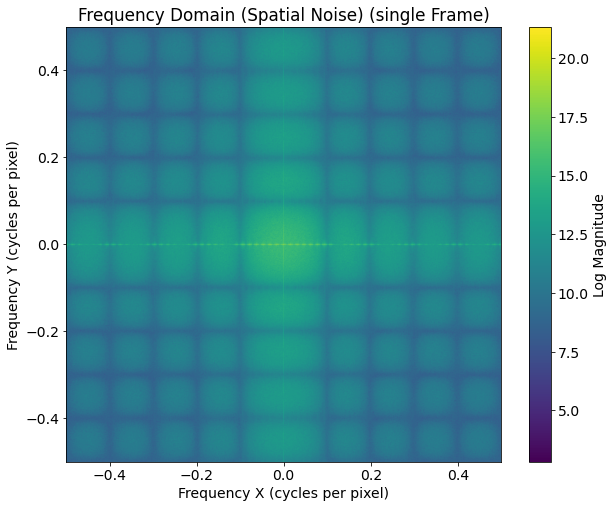

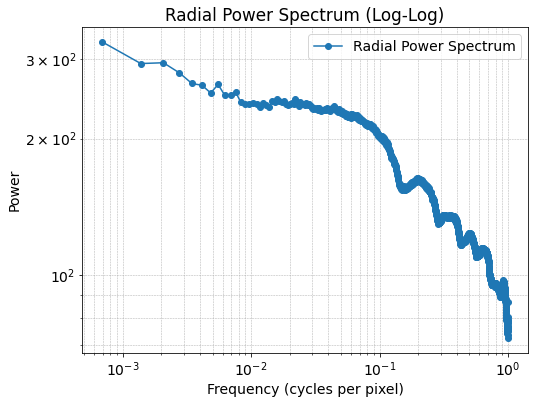

In [28]:
hdu2 = fits.open("10ramp_1c_1g_1read_1reset/H2RG_Slow_FullWin_20241210_000001.fits")
single_image_data = hdu2[0].data
#.data.astype(np.int32)
hdul.close()


def analyze_single_image(single_image, window_size=10):
    # Calculate spatial noise
    single_noise_image = calculate_spatial_noise(single_image, window_size)

    # Perform FFT analysis on the spatial noise map
    fft_image = np.fft.fft2(single_noise_image)
    fft_shifted = np.fft.fftshift(fft_image)  # Center the zero-frequency component
    magnitude_spectrum = np.log1p(np.abs(fft_shifted))

    # Plot the magnitude spectrum
    frequency_analysis_spatial(single_noise_image, title_suffix="(single Frame)")

    # Plot the radial power spectrum
    plot_radial_power_spectrum(magnitude_spectrum)

# Example usage: Assuming `cds_image_data` is the CDS image
analyze_single_image(single_image_data)
